### 1.2.1 : EDA: Advanced Feature Extraction.


In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from subprocess import check_output
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import os
import gc

import re
from nltk.corpus import stopwords
import distance
from nltk.stem import PorterStemmer
from bs4 import BeautifulSoup
import re
from nltk.corpus import stopwords
# This package is used for finding longest common subsequence between two strings
# you can write your own dp code for this
import distance
from nltk.stem import PorterStemmer
from bs4 import BeautifulSoup
from fuzzywuzzy import fuzz
from sklearn.manifold import TSNE
# Import the Required lib packages for WORD-Cloud generation
# https://stackoverflow.com/questions/45625434/how-to-install-wordcloud-in-python3-6
from wordcloud import WordCloud, STOPWORDS
from os import path
from PIL import Image

In [7]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/hirak_sen_roy/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [8]:
!wget --header="Host: doc-0k-7g-docs.googleusercontent.com" --header="User-Agent: Mozilla/5.0 (Windows NT 6.3; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/83.0.4103.116 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9" --header="Accept-Language: en-US,en;q=0.9,es;q=0.8,bn;q=0.7" --header="Referer: https://drive.google.com/drive/u/0/folders/1OWZoiQDvAvgOa-IUnEQ-6QKSEp_pw1XO" --header="Cookie: AUTH_n1uo5dhd8n5l88opia0096tdep4gr8f3_nonce=5oc9qg3l9qbpu; NID=200=oakYG17qbOoKPqe0qO2LF9m3bG1EFgzvU3prR8uQ3NwreSw6kxF5LB9QC9PYJrUItONrCz7iEf6pXPqaPgKZTpTBdG8qTtzq-CK50ynGbLs2Rh0RjtfA2XLEdAnch68SLaFfXtuGf5GNqCGoT_Hc-v8xrotuXbnKxsSiyfhE16I" --header="Connection: keep-alive" "https://doc-0k-7g-docs.googleusercontent.com/docs/securesc/hlhgfjcp907ppu26tddhe7iskaih68dg/298edsvgh8oanj61kku19uehq7d69cgm/1594742400000/06629147635963609455/01852114805349138987/1JncN1Fyt-ND_yZXOzqEfcRsYMTKqtu7Q?e=download&authuser=0&nonce=5oc9qg3l9qbpu&user=01852114805349138987&hash=hnm7iuati9ng5mipr3f38fofjvuga25s" -c -O 'nlp_features_train.csv'

--2020-07-14 16:00:33--  https://doc-0k-7g-docs.googleusercontent.com/docs/securesc/hlhgfjcp907ppu26tddhe7iskaih68dg/298edsvgh8oanj61kku19uehq7d69cgm/1594742400000/06629147635963609455/01852114805349138987/1JncN1Fyt-ND_yZXOzqEfcRsYMTKqtu7Q?e=download&authuser=0&nonce=5oc9qg3l9qbpu&user=01852114805349138987&hash=hnm7iuati9ng5mipr3f38fofjvuga25s
Resolving doc-0k-7g-docs.googleusercontent.com (doc-0k-7g-docs.googleusercontent.com)... 172.217.203.132, 2607:f8b0:400c:c07::84
Connecting to doc-0k-7g-docs.googleusercontent.com (doc-0k-7g-docs.googleusercontent.com)|172.217.203.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: ‘nlp_features_train.csv’

nlp_features_train.     [      <=>           ] 114.70M  92.3MB/s    in 1.2s    

2020-07-14 16:00:35 (92.3 MB/s) - ‘nlp_features_train.csv’ saved [120274028]



In [9]:
!wget --header="Host: doc-00-7g-docs.googleusercontent.com" --header="User-Agent: Mozilla/5.0 (Windows NT 6.3; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/83.0.4103.116 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9" --header="Accept-Language: en-US,en;q=0.9,es;q=0.8,bn;q=0.7" --header="Referer: https://drive.google.com/drive/u/0/folders/1OWZoiQDvAvgOa-IUnEQ-6QKSEp_pw1XO" --header="Cookie: AUTH_n1uo5dhd8n5l88opia0096tdep4gr8f3=01852114805349138987|1594742400000|bd1v0ngqt4ju7a5rl09210c60c2v98je; NID=200=oakYG17qbOoKPqe0qO2LF9m3bG1EFgzvU3prR8uQ3NwreSw6kxF5LB9QC9PYJrUItONrCz7iEf6pXPqaPgKZTpTBdG8qTtzq-CK50ynGbLs2Rh0RjtfA2XLEdAnch68SLaFfXtuGf5GNqCGoT_Hc-v8xrotuXbnKxsSiyfhE16I" --header="Connection: keep-alive" "https://doc-00-7g-docs.googleusercontent.com/docs/securesc/hlhgfjcp907ppu26tddhe7iskaih68dg/n4d89d87eis425lgrf4h4a3cp5cjn7rb/1594742475000/06629147635963609455/01852114805349138987/19KsWPoIMX3O_FrT4We0I1M7reKvFYKRr?e=download&authuser=0" -c -O 'train_p.txt'

--2020-07-14 16:02:04--  https://doc-00-7g-docs.googleusercontent.com/docs/securesc/hlhgfjcp907ppu26tddhe7iskaih68dg/n4d89d87eis425lgrf4h4a3cp5cjn7rb/1594742475000/06629147635963609455/01852114805349138987/19KsWPoIMX3O_FrT4We0I1M7reKvFYKRr?e=download&authuser=0
Resolving doc-00-7g-docs.googleusercontent.com (doc-00-7g-docs.googleusercontent.com)... 172.217.203.132, 2607:f8b0:400c:c07::84
Connecting to doc-00-7g-docs.googleusercontent.com (doc-00-7g-docs.googleusercontent.com)|172.217.203.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/plain]
Saving to: ‘train_p.txt’

train_p.txt             [  <=>               ]  15.36M  35.3MB/s    in 0.4s    

2020-07-14 16:02:05 (35.3 MB/s) - ‘train_p.txt’ saved [16109886]



In [10]:
!wget --header="Host: doc-08-7g-docs.googleusercontent.com" --header="User-Agent: Mozilla/5.0 (Windows NT 6.3; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/83.0.4103.116 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9" --header="Accept-Language: en-US,en;q=0.9,es;q=0.8,bn;q=0.7" --header="Referer: https://drive.google.com/drive/u/0/folders/1OWZoiQDvAvgOa-IUnEQ-6QKSEp_pw1XO" --header="Cookie: AUTH_n1uo5dhd8n5l88opia0096tdep4gr8f3=01852114805349138987|1594742400000|bd1v0ngqt4ju7a5rl09210c60c2v98je; NID=200=oakYG17qbOoKPqe0qO2LF9m3bG1EFgzvU3prR8uQ3NwreSw6kxF5LB9QC9PYJrUItONrCz7iEf6pXPqaPgKZTpTBdG8qTtzq-CK50ynGbLs2Rh0RjtfA2XLEdAnch68SLaFfXtuGf5GNqCGoT_Hc-v8xrotuXbnKxsSiyfhE16I" --header="Connection: keep-alive" "https://doc-08-7g-docs.googleusercontent.com/docs/securesc/hlhgfjcp907ppu26tddhe7iskaih68dg/een28v932k385dfigkkc74hm9f5mre24/1594742475000/06629147635963609455/01852114805349138987/1peorE_ke1MoaZCkrNQpap1ozJ15fuk2s?e=download&authuser=0" -c -O 'train_n.txt'

--2020-07-14 16:02:39--  https://doc-08-7g-docs.googleusercontent.com/docs/securesc/hlhgfjcp907ppu26tddhe7iskaih68dg/een28v932k385dfigkkc74hm9f5mre24/1594742475000/06629147635963609455/01852114805349138987/1peorE_ke1MoaZCkrNQpap1ozJ15fuk2s?e=download&authuser=0
Resolving doc-08-7g-docs.googleusercontent.com (doc-08-7g-docs.googleusercontent.com)... 172.217.203.132, 2607:f8b0:400c:c07::84
Connecting to doc-08-7g-docs.googleusercontent.com (doc-08-7g-docs.googleusercontent.com)|172.217.203.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/plain]
Saving to: ‘train_n.txt’

train_n.txt             [  <=>               ]  31.66M  94.4MB/s    in 0.3s    

2020-07-14 16:02:40 (94.4 MB/s) - ‘train_n.txt’ saved [33193130]



In [7]:
#https://stackoverflow.com/questions/12468179/unicodedecodeerror-utf8-codec-cant-decode-byte-0x9c
if os.path.isfile('df_fe_without_preprocessing_train.csv'):
    df = pd.read_csv("df_fe_without_preprocessing_train.csv",encoding='latin-1')
    df = df.fillna('')
    df.head()
else:
    print("get df_fe_without_preprocessing_train.csv from drive or run the previous notebook")

In [8]:
df.head(2)

id  qid1  qid2  ... word_share freq_q1+q2  freq_q1-q2
0   0     1     2  ...   0.434783          2           0
1   1     3     4  ...   0.200000          5           3

[2 rows x 17 columns]

<h2> 3.4 Preprocessing of Text </h2>

- Preprocessing:
    - Removing html tags 
    - Removing Punctuations
    - Performing stemming
    - Removing Stopwords
    - Expanding contractions etc.

In [9]:
# To get the results in 4 decemal points
SAFE_DIV = 0.0001 

STOP_WORDS = stopwords.words("english")


def preprocess(x):
    x = str(x).lower()
    x = x.replace(",000,000", "m").replace(",000", "k").replace("′", "'").replace("’", "'")\
                           .replace("won't", "will not").replace("cannot", "can not").replace("can't", "can not")\
                           .replace("n't", " not").replace("what's", "what is").replace("it's", "it is")\
                           .replace("'ve", " have").replace("i'm", "i am").replace("'re", " are")\
                           .replace("he's", "he is").replace("she's", "she is").replace("'s", " own")\
                           .replace("%", " percent ").replace("₹", " rupee ").replace("$", " dollar ")\
                           .replace("€", " euro ").replace("'ll", " will")
    x = re.sub(r"([0-9]+)000000", r"\1m", x)
    x = re.sub(r"([0-9]+)000", r"\1k", x)
    
    
    porter = PorterStemmer()
    pattern = re.compile('\W')
    
    if type(x) == type(''):
        x = re.sub(pattern, ' ', x)
    
    
    if type(x) == type(''):
        x = porter.stem(x)
        example1 = BeautifulSoup(x)
        x = example1.get_text()
               
    
    return x
    

- Function to Compute and get the features : With 2 parameters of Question 1 and Question 2

<h2> 3.5 Advanced Feature Extraction (NLP and Fuzzy Features) </h2>

Definition:
- __Token__: You get a token by splitting sentence a space
- __Stop_Word__ : stop words as per NLTK.
- __Word__ : A token that is not a stop_word


Features:
- __cwc_min__ :  Ratio of common_word_count to min lenghth of word count of Q1 and Q2 <br>cwc_min = common_word_count / (min(len(q1_words), len(q2_words))
<br>
<br>
- __cwc_max__ :  Ratio of common_word_count to max lenghth of word count of Q1 and Q2 <br>cwc_max = common_word_count / (max(len(q1_words), len(q2_words))
<br>
<br>
- __csc_min__ :  Ratio of common_stop_count to min lenghth of stop count of Q1 and Q2 <br> csc_min = common_stop_count / (min(len(q1_stops), len(q2_stops))
<br>
<br>
- __csc_max__ :  Ratio of common_stop_count to max lenghth of stop count of Q1 and Q2<br>csc_max = common_stop_count / (max(len(q1_stops), len(q2_stops))
<br>
<br>
- __ctc_min__ :  Ratio of common_token_count to min lenghth of token count of Q1 and Q2<br>ctc_min = common_token_count / (min(len(q1_tokens), len(q2_tokens))
<br>
<br>

- __ctc_max__ :  Ratio of common_token_count to max lenghth of token count of Q1 and Q2<br>ctc_max = common_token_count / (max(len(q1_tokens), len(q2_tokens))
<br>
<br>
        
- __last_word_eq__ :  Check if First word of both questions is equal or not<br>last_word_eq = int(q1_tokens[-1] == q2_tokens[-1])
<br>
<br>

- __first_word_eq__ :  Check if First word of both questions is equal or not<br>first_word_eq = int(q1_tokens[0] == q2_tokens[0])
<br>
<br>
        
- __abs_len_diff__ :  Abs. length difference<br>abs_len_diff = abs(len(q1_tokens) - len(q2_tokens))
<br>
<br>

- __mean_len__ :  Average Token Length of both Questions<br>mean_len = (len(q1_tokens) + len(q2_tokens))/2
<br>
<br>


- __fuzz_ratio__ :  https://github.com/seatgeek/fuzzywuzzy#usage
http://chairnerd.seatgeek.com/fuzzywuzzy-fuzzy-string-matching-in-python/
<br>
<br>

- __fuzz_partial_ratio__ :  https://github.com/seatgeek/fuzzywuzzy#usage
http://chairnerd.seatgeek.com/fuzzywuzzy-fuzzy-string-matching-in-python/
<br>
<br>


- __token_sort_ratio__ : https://github.com/seatgeek/fuzzywuzzy#usage
http://chairnerd.seatgeek.com/fuzzywuzzy-fuzzy-string-matching-in-python/
<br>
<br>


- __token_set_ratio__ : https://github.com/seatgeek/fuzzywuzzy#usage
http://chairnerd.seatgeek.com/fuzzywuzzy-fuzzy-string-matching-in-python/
<br>
<br>





- __longest_substr_ratio__ :  Ratio of length longest common substring to min lenghth of token count of Q1 and Q2<br>longest_substr_ratio = len(longest common substring) / (min(len(q1_tokens), len(q2_tokens))


In [11]:
def get_token_features(q1, q2):
    token_features = [0.0]*10
    
    # Converting the Sentence into Tokens: 
    q1_tokens = q1.split()
    q2_tokens = q2.split()

    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return token_features
    # Get the non-stopwords in Questions
    q1_words = set([word for word in q1_tokens if word not in STOP_WORDS])
    q2_words = set([word for word in q2_tokens if word not in STOP_WORDS])
    
    #Get the stopwords in Questions
    q1_stops = set([word for word in q1_tokens if word in STOP_WORDS])
    q2_stops = set([word for word in q2_tokens if word in STOP_WORDS])
    
    # Get the common non-stopwords from Question pair
    common_word_count = len(q1_words.intersection(q2_words))
    
    # Get the common stopwords from Question pair
    common_stop_count = len(q1_stops.intersection(q2_stops))
    
    # Get the common Tokens from Question pair
    common_token_count = len(set(q1_tokens).intersection(set(q2_tokens)))
    
    
    token_features[0] = common_word_count / (min(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[1] = common_word_count / (max(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[2] = common_stop_count / (min(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[3] = common_stop_count / (max(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[4] = common_token_count / (min(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    token_features[5] = common_token_count / (max(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    
    # Last word of both question is same or not
    token_features[6] = int(q1_tokens[-1] == q2_tokens[-1])
    
    # First word of both question is same or not
    token_features[7] = int(q1_tokens[0] == q2_tokens[0])
    
    token_features[8] = abs(len(q1_tokens) - len(q2_tokens))
    
    #Average Token Length of both Questions
    token_features[9] = (len(q1_tokens) + len(q2_tokens))/2
    return token_features

# get the Longest Common sub string

def get_longest_substr_ratio(a, b):
    strs = list(distance.lcsubstrings(a, b))
    if len(strs) == 0:
        return 0
    else:
        return len(strs[0]) / (min(len(a), len(b)) + 1)

def extract_features(df):
    # preprocessing each question
    df["question1"] = df["question1"].fillna("").apply(preprocess)
    df["question2"] = df["question2"].fillna("").apply(preprocess)

    print("token features...")
    
    # Merging Features with dataset
    
    token_features = df.apply(lambda x: get_token_features(x["question1"], x["question2"]), axis=1)
    
    df["cwc_min"]       = list(map(lambda x: x[0], token_features))
    df["cwc_max"]       = list(map(lambda x: x[1], token_features))
    df["csc_min"]       = list(map(lambda x: x[2], token_features))
    df["csc_max"]       = list(map(lambda x: x[3], token_features))
    df["ctc_min"]       = list(map(lambda x: x[4], token_features))
    df["ctc_max"]       = list(map(lambda x: x[5], token_features))
    df["last_word_eq"]  = list(map(lambda x: x[6], token_features))
    df["first_word_eq"] = list(map(lambda x: x[7], token_features))
    df["abs_len_diff"]  = list(map(lambda x: x[8], token_features))
    df["mean_len"]      = list(map(lambda x: x[9], token_features))
   
    #Computing Fuzzy Features and Merging with Dataset
    
    # do read this blog: http://chairnerd.seatgeek.com/fuzzywuzzy-fuzzy-string-matching-in-python/
    # https://stackoverflow.com/questions/31806695/when-to-use-which-fuzz-function-to-compare-2-strings
    # https://github.com/seatgeek/fuzzywuzzy
    print("fuzzy features..")

    df["token_set_ratio"]       = df.apply(lambda x: fuzz.token_set_ratio(x["question1"], x["question2"]), axis=1)
    # The token sort approach involves tokenizing the string in question, sorting the tokens alphabetically, and 
    # then joining them back into a string We then compare the transformed strings with a simple ratio().
    df["token_sort_ratio"]      = df.apply(lambda x: fuzz.token_sort_ratio(x["question1"], x["question2"]), axis=1)
    df["fuzz_ratio"]            = df.apply(lambda x: fuzz.QRatio(x["question1"], x["question2"]), axis=1)
    df["fuzz_partial_ratio"]    = df.apply(lambda x: fuzz.partial_ratio(x["question1"], x["question2"]), axis=1)
    df["longest_substr_ratio"]  = df.apply(lambda x: get_longest_substr_ratio(x["question1"], x["question2"]), axis=1)
    return df

In [14]:
if os.path.isfile('nlp_features_train.csv'):
    df = pd.read_csv("nlp_features_train.csv",encoding='latin-1')
    df.fillna('')
else:
    print("Extracting features for train:")
    df = pd.read_csv("train.csv")
    df = extract_features(df)
    df.to_csv("nlp_features_train.csv", index=False)
df.head(2)

Extracting features for train:
token features...
fuzzy features..


id  qid1  qid2  ... fuzz_ratio fuzz_partial_ratio  longest_substr_ratio
0   0     1     2  ...         93                100              0.982759
1   1     3     4  ...         66                 75              0.596154

[2 rows x 21 columns]

<h3>3.5.1 Analysis of extracted features </h3>

<h4> 3.5.1.1 Plotting Word clouds</h4>

- Creating Word Cloud of Duplicates and Non-Duplicates Question pairs
- We can observe the most frequent occuring words

In [2]:
df = pd.read_csv('nlp_features_train.csv', encoding = 'latin-1' )
df.head(2)

id  qid1  qid2                                          question1  \
0   0     1     2  what is the step by step guide to invest in sh...   
1   1     3     4  what is the story of kohinoor  koh i noor  dia...   

                                           question2  is_duplicate   cwc_min  \
0  what is the step by step guide to invest in sh...             0  0.999980   
1  what would happen if the indian government sto...             0  0.799984   

    cwc_max   csc_min   csc_max  ...   ctc_max  last_word_eq  first_word_eq  \
0  0.833319  0.999983  0.999983  ...  0.785709           0.0            1.0   
1  0.399996  0.749981  0.599988  ...  0.466664           0.0            1.0   

   abs_len_diff  mean_len  token_set_ratio  token_sort_ratio  fuzz_ratio  \
0           2.0      13.0              100                93          93   
1           5.0      12.5               86                63          66   

   fuzz_partial_ratio  longest_substr_ratio  
0                 100              0.982759  
1                  75              0.596154  

[2 rows x 21 columns]

In [3]:
df_duplicate = df[df['is_duplicate'] == 1]
dfp_nonduplicate = df[df['is_duplicate'] == 0]

# Converting 2d array of q1 and q2 and flatten the array: like {{1,2},{3,4}} to {1,2,3,4}
p = np.dstack([df_duplicate["question1"], df_duplicate["question2"]]).flatten()
n = np.dstack([dfp_nonduplicate["question1"], dfp_nonduplicate["question2"]]).flatten()

print ("Number of data points in class 1 (duplicate pairs) :",len(p))
print ("Number of data points in class 0 (non duplicate pairs) :",len(n))

#Saving the np array into a text file
np.savetxt('train_p.txt', p, delimiter=' ', fmt='%s')
np.savetxt('train_n.txt', n, delimiter=' ', fmt='%s')

Number of data points in class 1 (duplicate pairs) : 298526
Number of data points in class 0 (non duplicate pairs) : 510054


In [4]:
# reading the text files and removing the Stop Words:
d = path.dirname('.')

textp_w = open(path.join(d, 'train_p.txt')).read()
textn_w = open(path.join(d, 'train_n.txt')).read()
stopwords = set(STOPWORDS)
stopwords.add("said")
stopwords.add("br")
stopwords.add(" ")
stopwords.remove("not")

stopwords.remove("no")
#stopwords.remove("good")
#stopwords.remove("love")
stopwords.remove("like")
#stopwords.remove("best")
#stopwords.remove("!")
print ("Total number of words in duplicate pair questions :",len(textp_w))
print ("Total number of words in non duplicate pair questions :",len(textn_w))

Total number of words in duplicate pair questions : 16109886
Total number of words in non duplicate pair questions : 33193130


__ Word Clouds generated from  duplicate pair question's text __

Word Cloud for Duplicate Question pairs


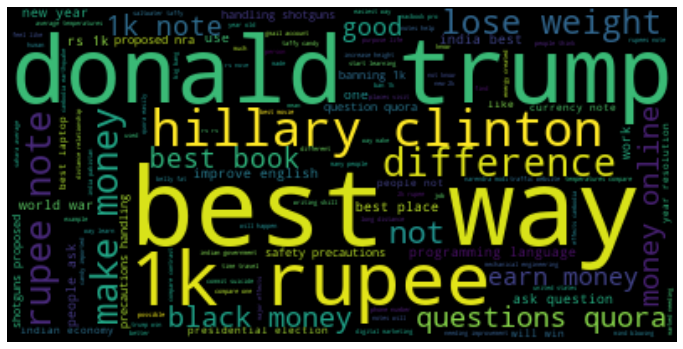

In [21]:
wc = WordCloud(background_color="black", max_words=len(textp_w), stopwords=stopwords)
wc.generate(textp_w)
print ("Word Cloud for Duplicate Question pairs")
plt.figure(figsize=(12,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

__ Word Clouds generated from non duplicate pair question's text __

Word Cloud for non-Duplicate Question pairs:


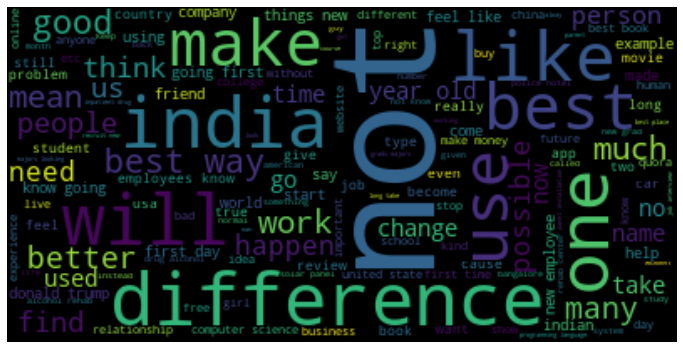

In [22]:
wc = WordCloud(background_color="black", max_words=len(textn_w),stopwords=stopwords)
# generate word cloud
wc.generate(textn_w)
print ("Word Cloud for non-Duplicate Question pairs:")
plt.figure(figsize=(12,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

<h4> 3.5.1.2 Pair plot of features ['ctc_min', 'cwc_min', 'csc_min', 'token_sort_ratio'] </h4>

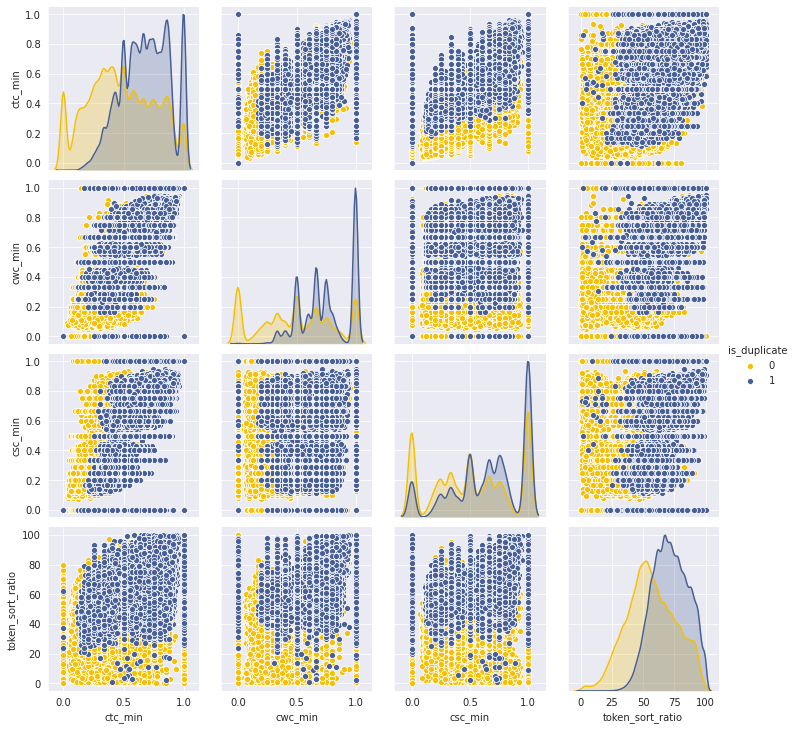

In [26]:
sns.set_style('darkgrid')
length = df.shape[0]
col_alt = ['golden', 'dusky blue']
sns.pairplot(df[['ctc_min', 'cwc_min', 'csc_min', 'token_sort_ratio',
                 'is_duplicate']][0:length], 
             hue='is_duplicate', palette = sns.xkcd_palette(col_alt),
             vars=['ctc_min', 'cwc_min', 'csc_min', 'token_sort_ratio'])
plt.show()

Here by looking at the PDFs and scatter plots it can be clearly observed that the feature `token_sort_ratio` is well seperable from rest of the features. `ctc_min`, `cwc_min`, `csc_min`, `token_sort_ratio` are also good features as they are able to partially seperate the duplicate and non duplicate questions. From the above pair plot we can come up with few conlusions. 

- By looking at the `ctc_min` distribution it can be observed that both the distibutions (for duplicate as well as non duplicate questions), the questions tends to be duplicate of one another as the value of `ctc_min` increases. This means `ctc_min` can partially seperate both the classes.

- By looking at the `cwc_min` distribution it can be observed that both the distibutions (for duplicate as well as non duplicate questions), the questions tends to be duplicate of one another as the value of `cwc_min` increases. This means `cwc_min` can partially seperate both the classes. 

- If we take a closer look at the distibutions of feature `csc_min`, it can be observed that the two classes are completely overlapping. There is no strict rule to seperate the two classes (duplicate or not) solely based on this feature.

- `token_sort_ratio` seperates the two classes partially. In general, as the value of `toke_sort_ration` becomes higher, there is a higher chance of two questions being duplicate of one another.

<h4> 3.5.1.3 Pair plot of features ['cwc_max', 'csc_max', 'ctc_max', 'last_word_eq', 'first_word_eq', 'abs_len_diff', 'mean_len'] </h4>

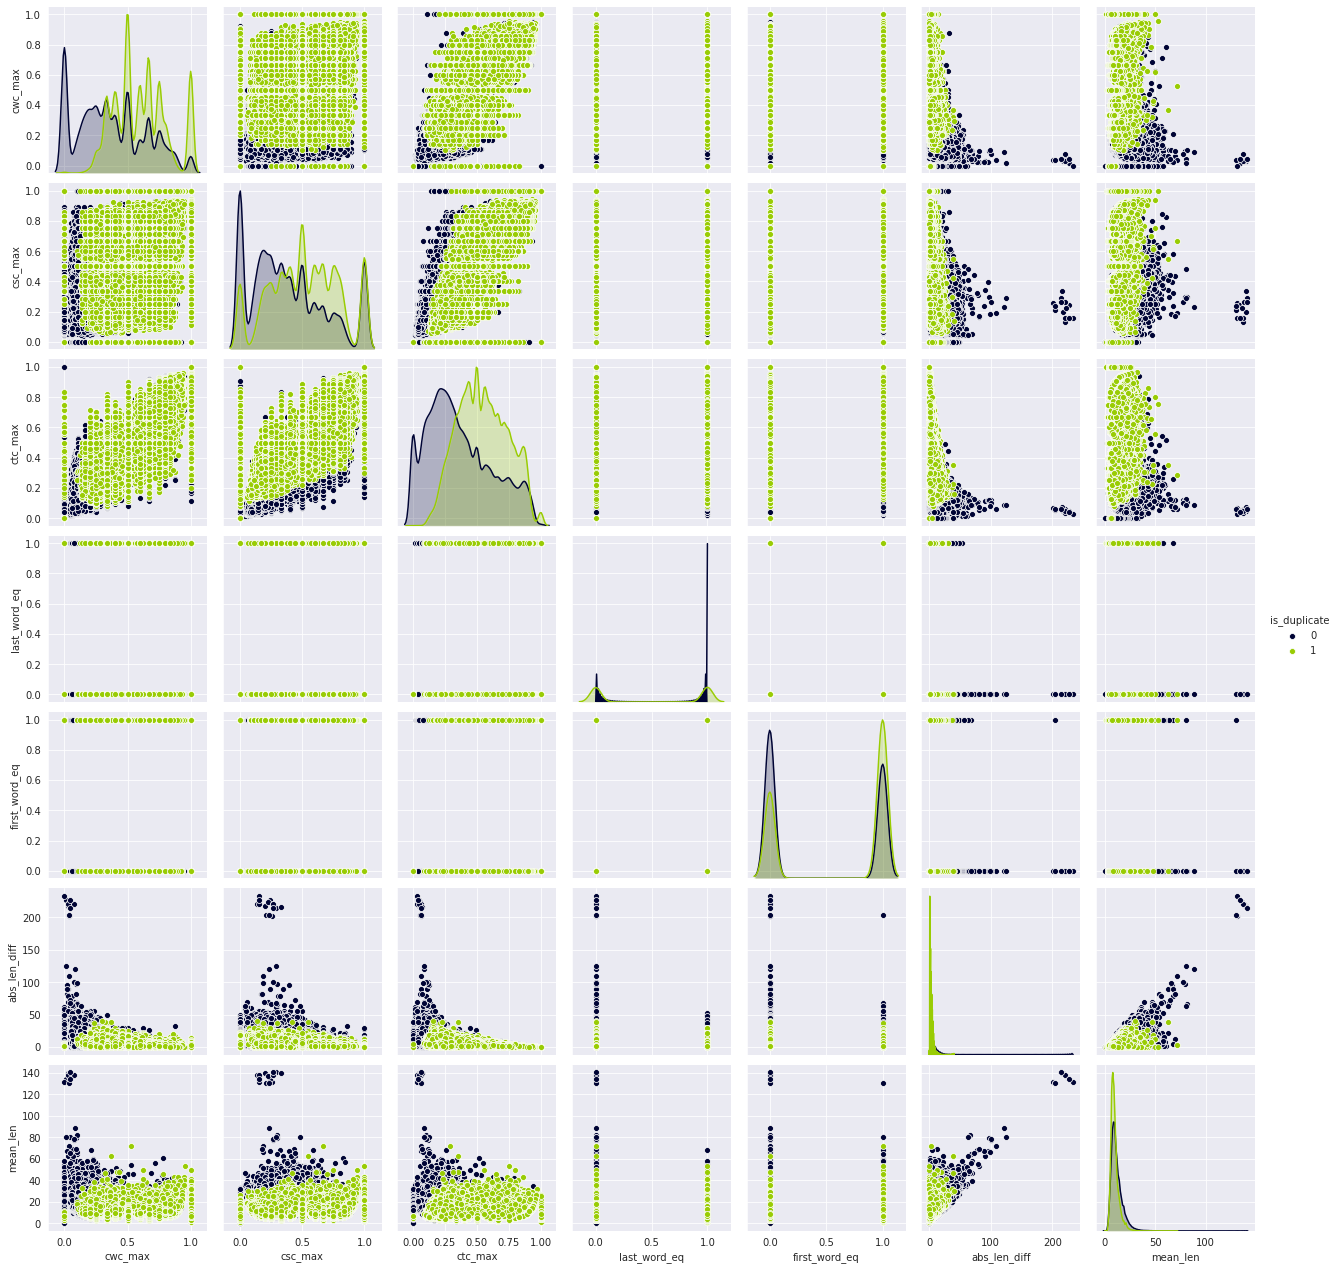

In [30]:
length = df.shape[0]
col_alt = ['dark navy', 'slime green']
sns.pairplot(df[['cwc_max', 'csc_max', 'ctc_max', 'last_word_eq', 
                      'first_word_eq', 'abs_len_diff', 'mean_len', 'is_duplicate']][0:length],
              hue='is_duplicate', palette = sns.xkcd_palette(col_alt),
             vars=['cwc_max', 'csc_max', 'ctc_max', 
                    'last_word_eq', 'first_word_eq', 'abs_len_diff', 'mean_len'])
plt.show()

- By looking at the histogram generated by `cwc_max`, it can be observed that it can partially seperate the class values. In general as the value of `cwc_max` increases there is a higher tendency of questions becoming duplicates of one another.
- `csc_max` alone cannot distinguish between the class labels that much. By looking at the histogram, it can be observed that the two class distributions are overlapping. However, `csc_max` vs `mean_len` scatter plot suggests that the two classes can be well seperated by a simple if-else condition, i.e if mean_len > 50 there is a higher chance of two questions being duplicate of one another.
- `mean_len`, `abs_len_diff`,`first_word_eq`, `last_word_eq` are not very robust features when it comes to single handedly seperating both the classes. As we can see from each of their histograms, the classes are highly overlapping. 
- `ctc_max` vs `mean_len` scatter plot can seperate both the classes using simple if-else conditions. We can say if ctc_max is strictly > 0.25 and `mean_len` is strictly < 50, there is a higher chance of a data point belonging to the duplicate class.

<h4> 3.5.1.4 Pair plot of fuzzy features ['fuzz_ratio', 'fuzz_partial_ratio', 'longest_substr_ratio', 'token_sort_ratio'] </h4>

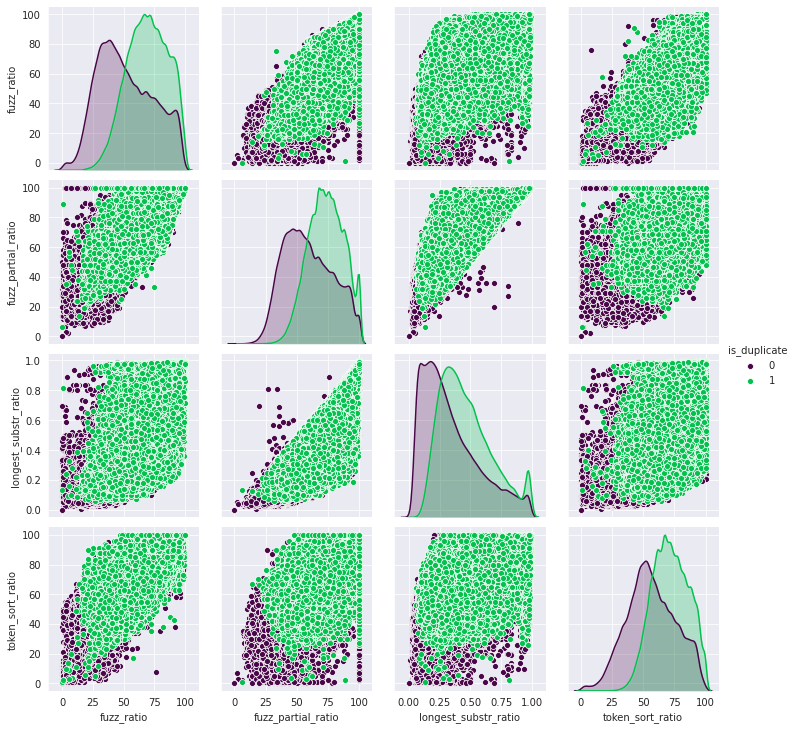

In [31]:
length = df.shape[0]
col_alt = ['deep violet', 'shamrock green']
sns.pairplot(df[['fuzz_ratio', 'fuzz_partial_ratio', 'longest_substr_ratio',
                 'token_sort_ratio', 'is_duplicate']][0:length],
              hue='is_duplicate', palette = sns.xkcd_palette(col_alt),
              vars=['fuzz_ratio', 'fuzz_partial_ratio', 'longest_substr_ratio', 'token_sort_ratio'])
plt.show()

 

- By looking at the `fuzz_ratio` distribution it can be observed that both the distibutions (for duplicate as well as non duplicate questions), the questions tends to be duplicate of one another as the value of `fuzz_ratio` increases. This means `fuzz_ratio` can alone partially seperate both the classes.

- By looking at the `fuzz_partial_ratio` distributionit can be observed that both the distibutions (for duplicate as well as non duplicate questions), the questions tends to be duplicate of one another as the value of `fuzz_partial_ratio` increases. This means `fuzz_partial_ratio` can alone partially seperate both the classes.

- `longest_substr_ratio` also seperates the two classes partially. In general, as the value of `longest_substr_ratio` increases, the questions tends to duplicates of one another. 

- `token_sort_ratio` seperates the two classes partially. In general, as the value of `toke_sort_ration` becomes higher, there is a higher chance of two questions being duplicate of one another.

- For the scatter plot of `fuzz_ratio` and `longest_substr_ratio` we can see that the two classes can be easily seperated by using a simple if-else condition. If `fuzz_ratio` > 50, it can be said that the questions are duplicates. 

- `token_sort_ratio` vs `longest_substr_ratio` can also seperate the two classes based on simple if-else conditions. It can be said if `token_sort_ratio` > 45, there is a higher likelihood of questions becoming duplicates of one another.

- for `token_sort_ratio` vs `fuzz_partial_ratio` it can be said that if `token_sort_ratio` > 30 and  `fuzz_partial_ratio` > 40, the questions are most likely  duplicates of one another. 

<h4> 3.5.1.5 Distribution of the token_sort_ratio </h4>

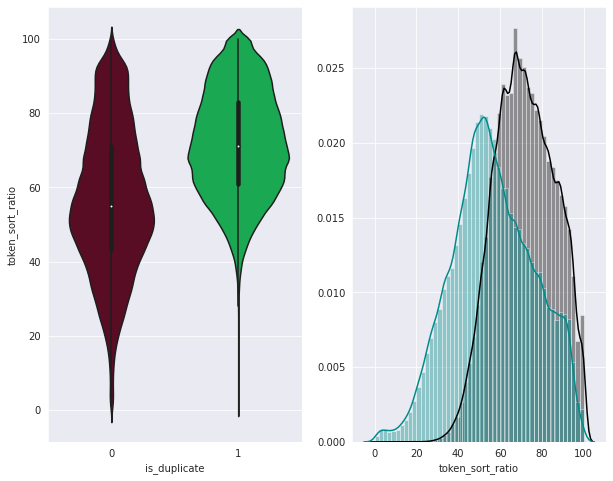

In [33]:
# Distribution of the token_sort_ratio
plt.figure(figsize=(10, 8))
col_alt = ['maroon', 'shamrock green']

plt.subplot(1,2,1)
sns.violinplot(x = 'is_duplicate', y = 'token_sort_ratio', data = df[0:], palette = sns.xkcd_palette(col_alt))

plt.subplot(1,2,2)
sns.distplot(df[df['is_duplicate'] == 1.0]['token_sort_ratio'][0:] , label = "1", color = 'black')
sns.distplot(df[df['is_duplicate'] == 0.0]['token_sort_ratio'][0:] , label = "0" , color = 'darkcyan' )
plt.show()

The percentile ranges in the violin plot is not very clearly seperable. The 75% percentile of `token_sort_ratio` in determining duplicates points coincides with the 25% percentile of the other class. This means the model will have a chance of making 25% error when it will try to predict a new data as duplicate or not solely based on this feature. Here we have a slight overlap between the distributions. But in general, we see as the `token_sort_ratio` increases the tendency of the questions to be similar increases.

<h4> 3.5.1.6 Distribution of the fuzz_ratio </h4>

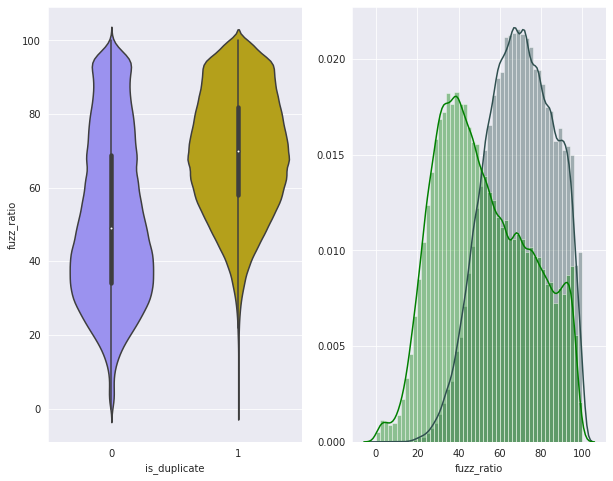

In [34]:
plt.figure(figsize=(10, 8))
col_alt = ['periwinkle', 'mustard']

plt.subplot(1,2,1)
sns.violinplot(x = 'is_duplicate', y = 'fuzz_ratio', data = df[0:], palette = sns.xkcd_palette(col_alt))

plt.subplot(1,2,2)
sns.distplot(df[df['is_duplicate'] == 1.0]['fuzz_ratio'][0:] , label = "1", color = 'darkslategrey')
sns.distplot(df[df['is_duplicate'] == 0.0]['fuzz_ratio'][0:] , label = "0" , color = 'green' )
plt.show()

Here we can observe the same thing, the percentile ranges in the violin plot is also not very clearly seperable. The 75% percentile of `fuzz_ratio` in determining duplicates points coincides with the 25% percentile of the other class. This means the model will have a chance of making 25% error when it will try to predict a new data as duplicate or not solely based on this feature. 
`fuzz_ratio` partially sperates the duplicate and non-duplicate classes. They are neither completely overlapping nor completely seperable. In general, it can be noticed that as the value of `fuzz_ratio` increases, the tendency of questions being duplicates of one another increases.

<h4> 3.5.1.7 Distribution of the fuzz_partial_ratio </h4>

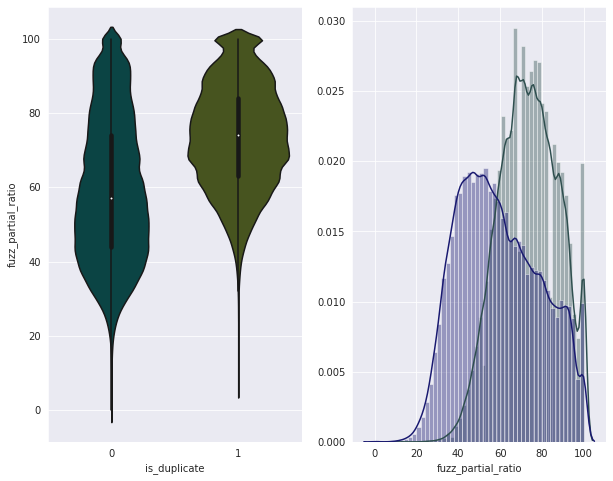

In [36]:
plt.figure(figsize=(10, 8))
col_alt = ['dark teal', 'army green']

plt.subplot(1,2,1)
sns.violinplot(x = 'is_duplicate', y = 'fuzz_partial_ratio', data = df[0:], palette = sns.xkcd_palette(col_alt))

plt.subplot(1,2,2)
sns.distplot(df[df['is_duplicate'] == 1.0]['fuzz_partial_ratio'][0:] , label = "1", color = 'darkslategrey')
sns.distplot(df[df['is_duplicate'] == 0.0]['fuzz_partial_ratio'][0:] , label = "0" , color = 'midnightblue' )
plt.show()

Here also, the overlapping of the percentiles can be observed. `fuzz_partial_ratio` distirbutions are overlapping for the two classes. So there is not a concrete way to seperate the two classes. However, it can be observed from the above, if the `fuzz_partial_ratio` value is higher, more often than not the questions tends to be duplicate. If the PDF of `fuzz_partial_ratio` higher than 0.020 it can be said that the questions are duplicates.

<h3>3.5.2 TSNE Visualization </h3>

<h4> 3.5.2.1 Using TSNE for Dimentionality reduction on the advance features </h4>

In [10]:
sns.set_style('darkgrid')


T-SNE Plot for perplexity = 30


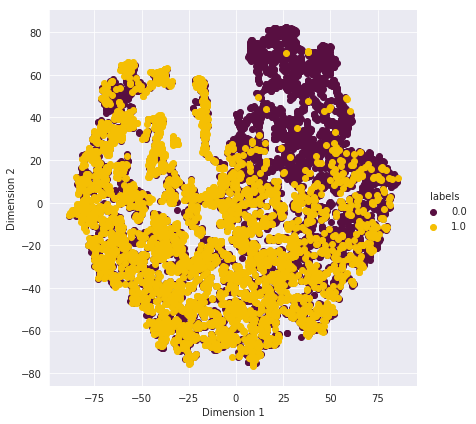


T-SNE Plot for perplexity = 50


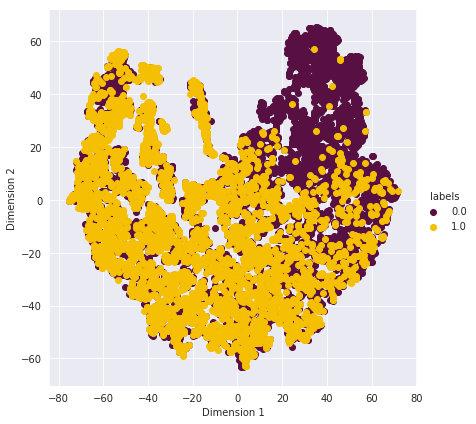


T-SNE Plot for perplexity = 100


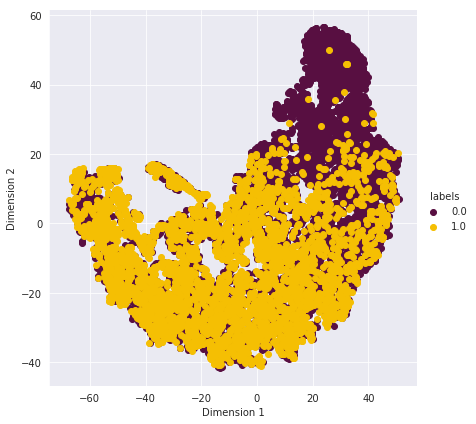


T-SNE Plot for perplexity = 500


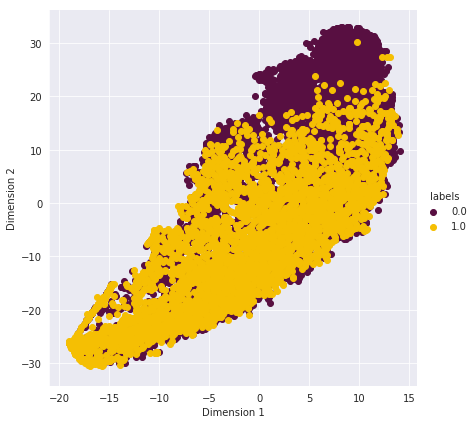

In [11]:
def tsne_plot(data, labels, perplexity):
    """
    Function for tsne visualisation
    """
    
    model = TSNE(n_components=2, 
                 init='random', 
                 random_state=0, 
                 n_jobs=-1, 
                 angle=0.5, method='barnes_hut', 
                 perplexity=perplexity,
                 n_iter=1000)
    tsne_data = model.fit_transform(data)
    
    # creating a new dataframe for plotting the data
    tsne_data = np.vstack((tsne_data.T, labels)).T
    tsne_df = pd.DataFrame(data=tsne_data, columns=("Dimension 1", "Dimension 2", "labels"))
    
    print("\nT-SNE Plot for perplexity = {}".format(perplexity))
    
    col = ['plum', 'golden']
    
    sns.FacetGrid(tsne_df, hue="labels", 
                  height=6, palette = sns.xkcd_palette(col)).map(plt.scatter, 
                                                                 'Dimension 1', 'Dimension 2').add_legend()
    plt.show()

    

sampled_dataset=df.sample(n=10000, random_state=0)
X = sampled_dataset[['cwc_min', 'cwc_max', 'csc_min', 'csc_max',
                     'ctc_min', 'ctc_max', 'last_word_eq',
                     'first_word_eq' , 'abs_len_diff' , 'mean_len' ,
                     'token_set_ratio' , 'token_sort_ratio' ,  'fuzz_ratio' ,
                     'fuzz_partial_ratio' , 'longest_substr_ratio']]
y = sampled_dataset['is_duplicate'].values

# plotting tsne visualisation for different perplexity
tsne_plot(X, y, 30)
tsne_plot(X, y, 50)
tsne_plot(X, y, 100)
tsne_plot(X, y, 500)



As can be seen from the above plots, the features are partially seperable. However, there is a significant amount of overlap. As the perplexity increases, the data becomes slightly more seperated. This can be explained by the fact that as the perplexity increases the number of neigbourhood distances that are preserved also increases.

<h4> 3.5.2.2 Using TSNE (2D) for Dimentionality reduction on the advance features </h4>

In [ ]:
# Using TSNE for Dimentionality reduction for 15 Features(Generated after cleaning the data) to 3 dimention

from sklearn.preprocessing import MinMaxScaler

dfp_subsampled = df[0:5000]
X = MinMaxScaler().fit_transform(dfp_subsampled[['cwc_min', 'cwc_max', 'csc_min', 'csc_max', 'ctc_min',
                                                 'ctc_max', 'last_word_eq', 'first_word_eq', 'abs_len_diff',
                                                 'mean_len', 'token_set_ratio', 'token_sort_ratio',  'fuzz_ratio',
                                                 'fuzz_partial_ratio', 'longest_substr_ratio']])
y = dfp_subsampled['is_duplicate'].values

In [12]:
def tsne_2d_lmplot(p):
    
    print("T-SNE with perplexity = {}".format(p))
    tsne2d = TSNE(n_components=2,
                  perplexity=p,
                  init='random', 
                  random_state=101,
                  method='barnes_hut',
                  n_iter=1000,
                  angle=0.5,
                  n_jobs=-1).fit_transform(X)
    col = ['moss green', 'blood red']
    
    dataset = pd.DataFrame({'x':tsne2d[:,0], 'y':tsne2d[:,1] ,'label':y})
    # draw the plot in appropriate place in the grid
    sns.lmplot(data=dataset, x='x', y='y', hue='label',
               fit_reg=False, height=8, palette=sns.xkcd_palette(col),
               markers=['s','o'])
    plt.title("perplexity : {} and max_iter : {}".format(p, 1000))
    plt.show()

T-SNE with perplexity = 5


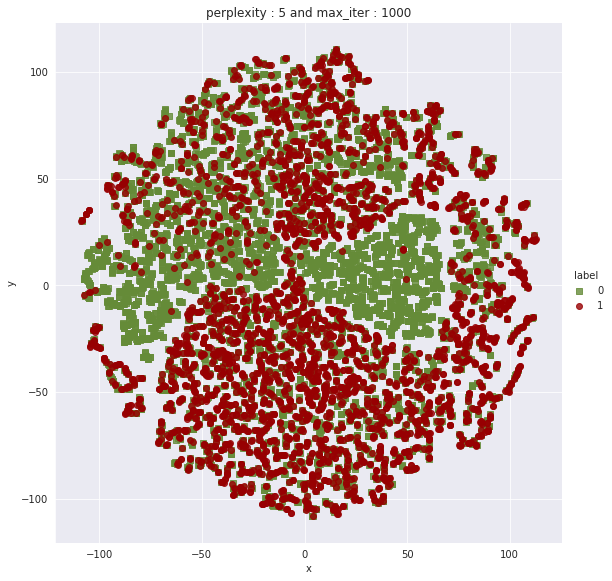

T-SNE with perplexity = 30


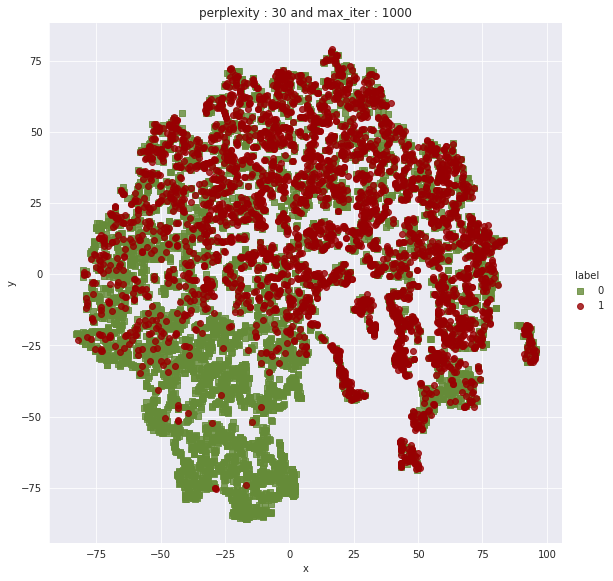

T-SNE with perplexity = 100


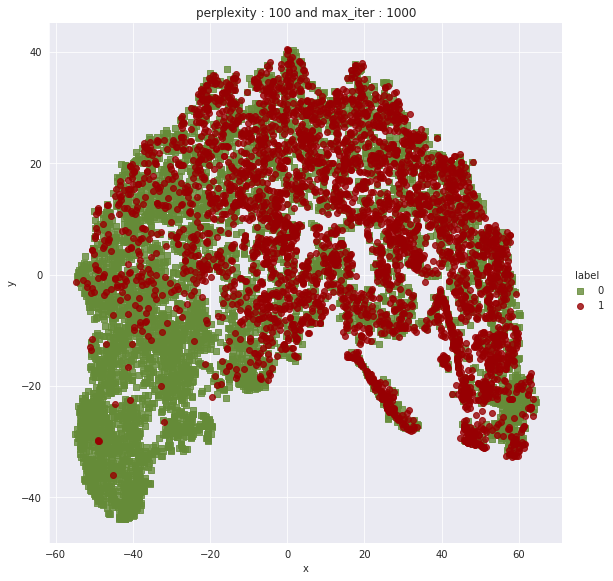

T-SNE with perplexity = 250


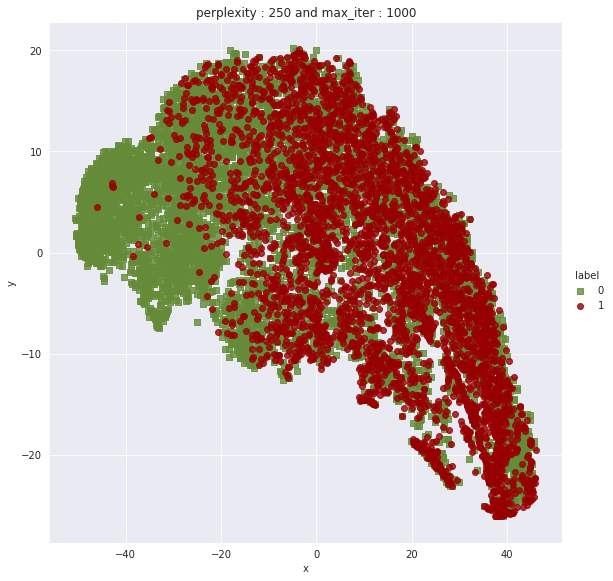

In [13]:
tsne_2d_lmplot(5)
tsne_2d_lmplot(30)
tsne_2d_lmplot(100)
tsne_2d_lmplot(250)

As can be seen from the above plots, the features are partially seperable. However, there is a significant amount of overlap. As the perplexity increases, the data becomes slightly more seperated. This can be explained by the fact that as the perplexity increases the number of neigbourhood distances that are preserved also increases.

<h4> 3.5.2.3 Using TSNE (3D) for Dimentionality reduction on the advance features </h4>

In [14]:
from sklearn.manifold import TSNE
tsne3d = TSNE(
    n_components=3,
    init='random', # pca
    random_state=101,
    method='barnes_hut',
    n_iter=1000,
    verbose=2,
    angle=0.5
).fit_transform(X)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.019s...
[t-SNE] Computed neighbors for 10000 samples in 0.751s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 2.843861
[t-SNE] Computed conditional probabilities in 0.612s
[t-SNE] Iteration 50: error = 97.9783325, gradient norm = 0.0061230 (50 iterations in 8.212s)
[t-SNE] It

In [16]:
py.init_notebook_mode()
trace1 = go.Scatter3d(
    x=tsne3d[:,0],
    y=tsne3d[:,1],
    z=tsne3d[:,2],
    mode='markers',
    marker=dict(
        sizemode='diameter',
        color = y,
        colorscale = 'Portland',
        colorbar = dict(title = 'duplicate'),
        line=dict(color='rgb(255, 255, 255)'),
        opacity=0.75
    )
)

data=[trace1]
layout=dict(height=800, width=800, title='3d embedding with engineered features')
fig=dict(data=data, layout=layout)
py.iplot(fig, filename='3DBubble')


In [24]:
py.plot(fig, filename='tsne_3d.html')

'tsne_3d.html'

From the above 3D TSNE plot it can be observed that duplicate and non duplicate questions can be well seperated partially.

<h2> 3.6 Feature importance (Advance Features and Basic Features) </h2>
<h3> 3.6.1 Load the  feature engineering datasets </h3>

In [2]:
if os.path.isfile('nlp_features_train.csv'):
    df_adv_feats = pd.read_csv("nlp_features_train.csv",encoding='latin-1')
else:
    print("download nlp_features_train.csv from drive or run previous notebook")

if os.path.isfile('df_fe_without_preprocessing_train.csv'):
    df_basic_feats = pd.read_csv("df_fe_without_preprocessing_train.csv",encoding='latin-1')
else:
    print("download df_fe_without_preprocessing_train.csv from drive or run previous notebook")

In [3]:
df_adv_feats.shape, df_basic_feats.shape

((404290, 21), (404290, 17))

In [4]:
df_adv_feats.head(2)

id  qid1  qid2                                          question1  \
0   0     1     2  what is the step by step guide to invest in sh...   
1   1     3     4  what is the story of kohinoor  koh i noor  dia...   

                                           question2  is_duplicate   cwc_min  \
0  what is the step by step guide to invest in sh...             0  0.999980   
1  what would happen if the indian government sto...             0  0.799984   

    cwc_max   csc_min   csc_max  ...   ctc_max  last_word_eq  first_word_eq  \
0  0.833319  0.999983  0.999983  ...  0.785709           0.0            1.0   
1  0.399996  0.749981  0.599988  ...  0.466664           0.0            1.0   

   abs_len_diff  mean_len  token_set_ratio  token_sort_ratio  fuzz_ratio  \
0           2.0      13.0              100                93          93   
1           5.0      12.5               86                63          66   

   fuzz_partial_ratio  longest_substr_ratio  
0                 100              0.982759  
1                  75              0.596154  

[2 rows x 21 columns]

In [5]:
df_basic_feats.head(2)

id  qid1  qid2                                          question1  \
0   0     1     2  What is the step by step guide to invest in sh...   
1   1     3     4  What is the story of Kohinoor (Koh-i-Noor) Dia...   

                                           question2  is_duplicate  freq_qid1  \
0  What is the step by step guide to invest in sh...             0          1   
1  What would happen if the Indian government sto...             0          4   

   freq_qid2  q1len  q2len  q1_n_words  q2_n_words  word_Common  word_Total  \
0          1     66     57          14          12         10.0        23.0   
1          1     51     88           8          13          4.0        20.0   

   word_share  freq_q1+q2  freq_q1-q2  
0    0.434783           2           0  
1    0.200000           5           3

In [7]:
# encode questions to unicode
# https://stackoverflow.com/a/6812069

df_adv_feats['question1'] = df_adv_feats['question1'].apply(lambda x: str(x))
df_adv_feats['question2'] = df_adv_feats['question2'].apply(lambda x: str(x))

In [8]:
#Taking the processed texts
df_ques = df_adv_feats[['question1','question2']]

#Extracting only the basic and advance features and nothing else
df_adv = df_adv_feats.iloc[0:,6:]
df_basic = df_basic_feats.iloc[0:,6:]

labels = df_adv_feats[['is_duplicate']]

<h4> 3.6.1.1 Combine all the dataframes containing questions, basic and advance features </h4>

In [9]:
#Merge into one single dataframe and save it for later use.
dt_df = pd.concat([df_ques, df_basic, df_adv, labels],axis=1)
dt_df.to_csv('all_features.csv', index=False)